# **CLASSIFICATION OF BREAST TUMOR - BENIGN/MALIGN**

**INTRODUCTION:**

Breast Cancer is one of the most common diseases that is responsible for a high rate of deaths every year among women, after lung and skin cancer, impacting around 2.1 million women each year.

Machine Learning techniques are an efficient way to categorise and identify data, particularly in medical fields and these approaches can be broadly used in diagnosis that can aid in making better decisions. Carcinogenic Tumor cells in the breast region are generally categorised to be binary (B/M)

**AIM:** 

To automate the process of diagnosis for breast cancer based on previously logged data using patient information and try to predict the category of the tumor (Benign / Malignant ) using machine learning and also to identify the classifier that ensures best accuracy in classification of the tumor, considering all the features.

**DATASET:**

The data for the analysis and classification is [Wisconsin Breast Cancer (WBCO) original dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)) from UCI Machine learning repository. A copy of the datset can also be downloaded from [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).


In this notebook, we will try to classify the tumor cells to be either Benign or Malignant and we will also try to find a classifer that shows promising accuracy. The ML models used are Decision Tree, Gaussian Naive Bayes, Logistic Regression, Random Forest, Support Vector Machine.



In [2]:
import os
import scipy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import graphviz
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **EXPLORATORY DATA ANALYSIS**

In [7]:
cancer = pd.read_csv("/content/tumor_data.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
cancer.shape

(569, 33)

In [9]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
cancer.duplicated().sum()

0

In [12]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [13]:
cancer.drop("Unnamed: 32",axis=1,inplace=True)

## **VISUALIZATIONS**

In [68]:
d_count= cancer['diagnosis'].value_counts()
d_count

B    357
M    212
Name: diagnosis, dtype: int64

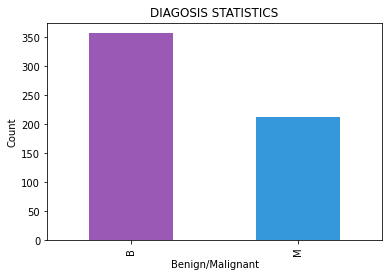

In [117]:
d_count.plot(kind='bar',color=["#9b59b6", "#3498db"])
plt.ylabel('Count')
plt.xlabel('Benign/Malignant')
plt.title('DIAGOSIS STATISTICS');

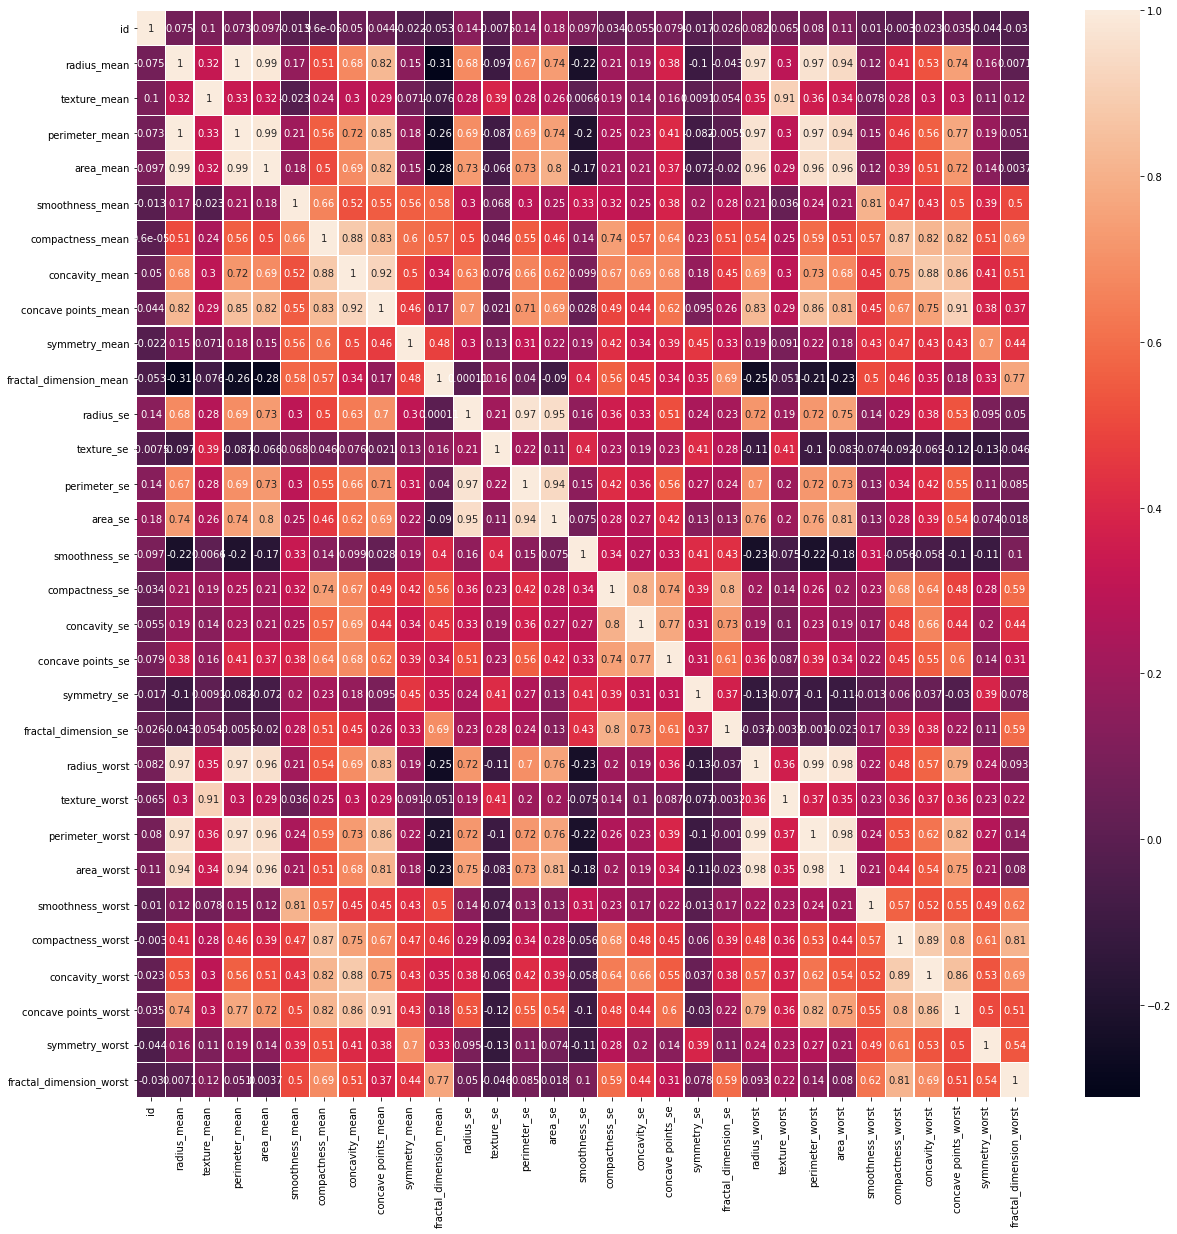

In [76]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(cancer.corr(), annot=True, linewidths=.5);

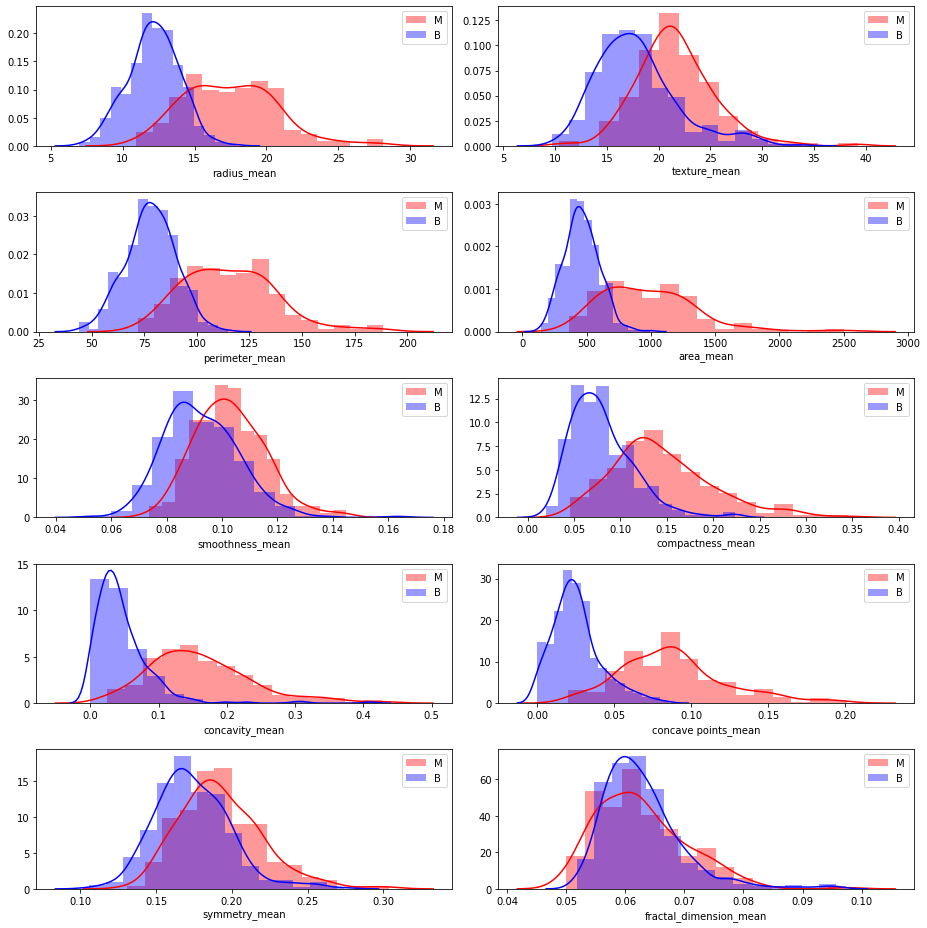

In [148]:
mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
bins = 15
plt.figure(figsize=(13,13))
for i, j in enumerate(mean):
    rows = int(len(mean)/2)
    plt.subplot(rows, 2, i+1)
    sns.distplot(cancer[cancer['diagnosis']=='M'][j], bins=bins, color='red', label='M');
    sns.distplot(cancer[cancer['diagnosis']=='B'][j], bins=bins, color='blue', label='B');
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

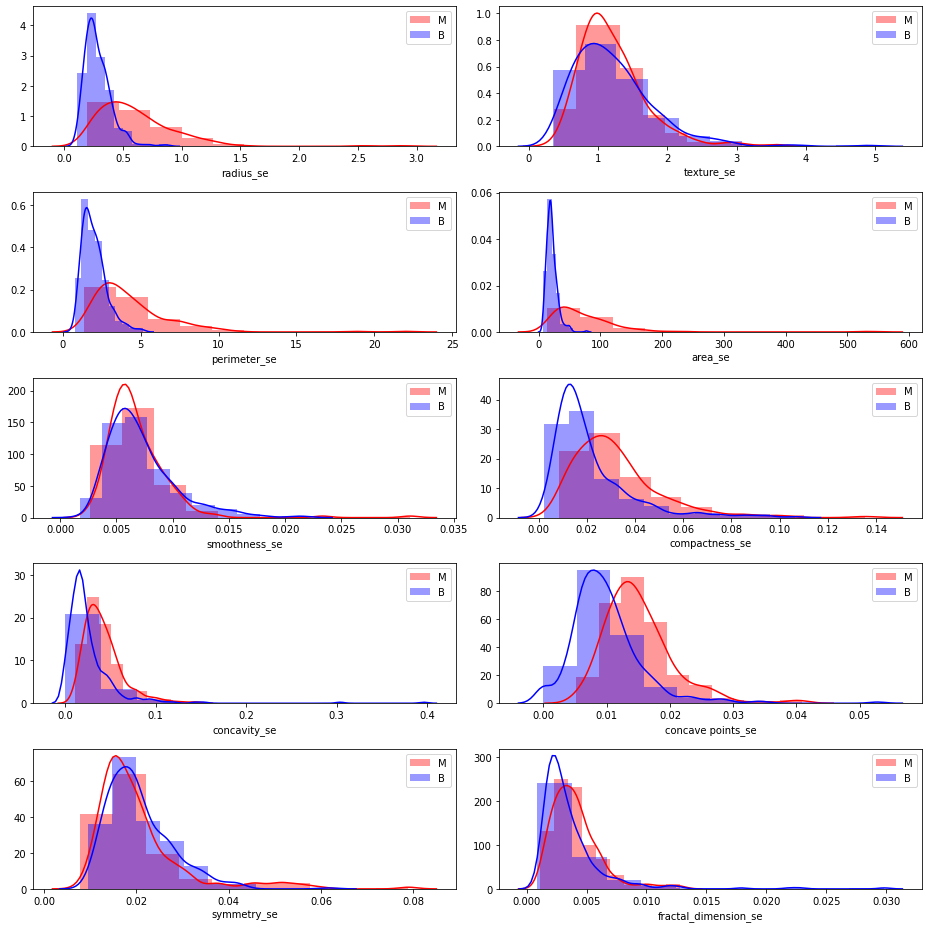

In [151]:
se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
      'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se']

bins = 10
plt.figure(figsize=(13,13))
for i, j in enumerate(se):
    rows = int(len(se)/2)
    plt.subplot(rows, 2, i+1)
    sns.distplot(cancer[cancer['diagnosis']=='M'][j], bins=bins, color='red', label='M');
    sns.distplot(cancer[cancer['diagnosis']=='B'][j], bins=bins, color='blue', label='B');
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

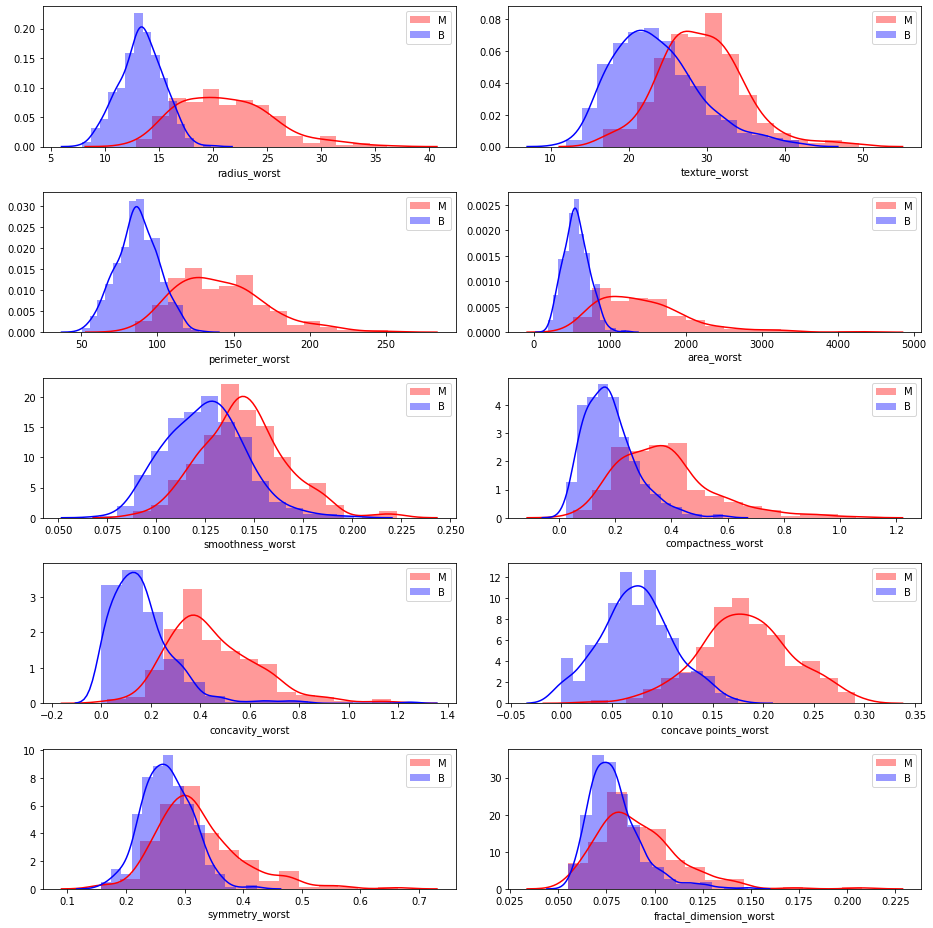

In [152]:
worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
        'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
bins = 15
plt.figure(figsize=(13,13))
for i, j in enumerate(worst):
    rows = int(len(worst)/2)
    plt.subplot(rows, 2, i+1)
    sns.distplot(cancer[cancer['diagnosis']=='M'][j], bins=bins, color='red', label='M');
    sns.distplot(cancer[cancer['diagnosis']=='B'][j], bins=bins, color='blue', label='B');
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## **MODEL BUILDING**

In [104]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cancer.drop(['diagnosis','id'], axis = 1)
y = cancer['diagnosis'].map({'B':0,'M':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [105]:
print(X_train.shape,y_train.shape)

(398, 30) (398,)


In [106]:
print(X_test.shape,y_test.shape)

(171, 30) (171,)


In [153]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,0.1883,0.06168,0.2562,1.0380,1.686,18.62,0.006662,0.012280,0.021050,0.010060,0.01677,0.002784,12.65,21.19,80.88,491.8,0.1389,0.15820,0.180400,0.09608,0.2664,0.07809
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.2140,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.032880,0.028210,0.013500,0.01610,0.002744,16.45,27.26,112.10,828.5,0.1153,0.34290,0.251200,0.13390,0.2534,0.07858
529,12.07,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,0.06608,0.2513,0.5040,1.714,18.54,0.007327,0.011530,0.017980,0.007986,0.01962,0.002234,13.45,15.77,86.92,549.9,0.1521,0.16320,0.162200,0.07393,0.2781,0.08052
422,11.61,16.02,75.46,408.2,0.10880,0.11680,0.070970,0.044970,0.1886,0.06320,0.2456,0.7339,1.667,15.89,0.005884,0.020050,0.026310,0.013040,0.01848,0.001982,12.64,19.67,81.93,475.7,0.1415,0.21700,0.230200,0.11050,0.2787,0.07427


In [155]:
y_train.head()

249    0
58     0
476    0
529    0
422    0
Name: diagnosis, dtype: int64

## **MODEL DEVELOPMENT AND EVALUATION**

### 1.RANDOM FOREST

In [107]:
from sklearn.ensemble import RandomForestClassifier

model_1= RandomForestClassifier(n_estimators=100)
model_1.fit(X_train,y_train)

train_1= model_1.score(X_train,y_train)
test_1= model_1.score(X_test,y_test)

print('Training accuracy:',train_1*100,'%')
print('Testing accuracy:',test_1*100,'%')

Training accuracy: 100.0 %
Testing accuracy: 94.73684210526315 %


### 2.DECISION TREE 

In [108]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

model_2= DecisionTreeClassifier()
model_2.fit(X_train,y_train)

train_2= model_2.score(X_train,y_train)
test_2= model_2.score(X_test,y_test)

print('Training accuracy:',train_2*100,'%')
print('Testing accuracy:',test_2*100,'%')

Training accuracy: 100.0 %
Testing accuracy: 95.32163742690058 %


### 3.SUPPORT VECTOR MACHINE

In [109]:
from sklearn import svm
model_3= svm.SVC()
model_3.fit(X_train,y_train)

train_3= model_3.score(X_train,y_train)
test_3= model_3.score(X_test,y_test)

print('Training accuracy:',train_3*100,'%')
print('Testing accuracy:',test_3*100,'%')


Training accuracy: 92.21105527638191 %
Testing accuracy: 91.81286549707602 %


### 4.LOGISTIC REGRESSION

In [110]:
from sklearn.linear_model import LogisticRegression

model_4= LogisticRegression()
model_4.fit(X_train,y_train)

train_4= model_4.score(X_train,y_train)
test_4= model_4.score(X_test,y_test)

print('Training accuracy:',train_4*100,'%')
print('Testing accuracy:',test_4*100,'%')

Training accuracy: 95.22613065326632 %
Testing accuracy: 93.56725146198829 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 5.GAUSSIAN NAVIE BAYES

In [111]:
from sklearn.naive_bayes import GaussianNB

model_5= GaussianNB()
model_5.fit(X_train,y_train)

train_5= model_5.score(X_train,y_train)
test_5= model_5.score(X_test,y_test)

print('Training accuracy:',train_5*100,'%')
print('Testing accuracy:',test_5*100,'%')

Training accuracy: 93.96984924623115 %
Testing accuracy: 94.73684210526315 %


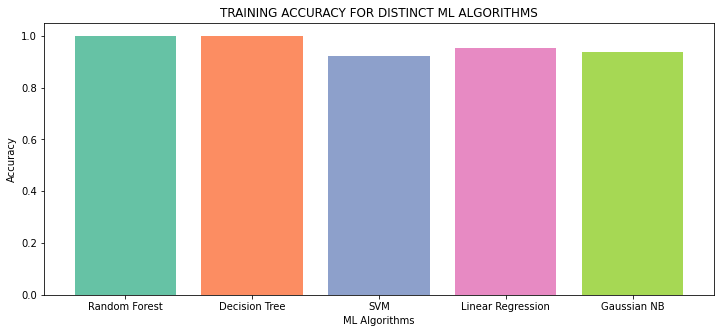

In [130]:
plt.subplots(figsize=(12,5))
plt.bar(['Random Forest','Decision Tree','SVM','Linear Regression','Gaussian NB'],[train_1,train_2,train_3,train_4,train_5],color=sns.color_palette("Set2"))
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy')
plt.title('TRAINING ACCURACY FOR DISTINCT ML ALGORITHMS')
plt.show()

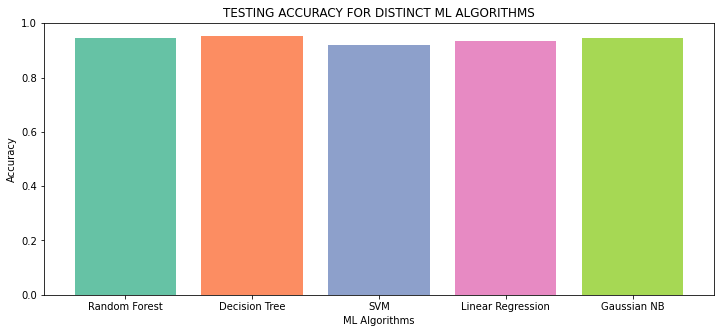

In [131]:
plt.subplots(figsize=(12,5))
plt.bar(['Random Forest','Decision Tree','SVM','Linear Regression','Gaussian NB'],[test_1,test_2,test_3,test_4,test_5],color=sns.color_palette("Set2"))
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy')
plt.title('TESTING ACCURACY FOR DISTINCT ML ALGORITHMS')
plt.show()

## **CONCLUSION**

To conclude, the experimental results show that  Decision Tree Classifiers show best accuracy to the data followed by Random Forest and Gaussian NB. 



1. Decision Tree - 95.3%
2. Random Forest - 94.7%
3. Gaussian Naive Bayes - 94.7%
4. Logistic Regression - 93.5%
5. Support Vector Machine - 91.8%


